<a href="https://colab.research.google.com/github/ManciniGa/Aprendizado-Profundo/blob/main/OCR_Detec%C3%A7%C3%A3o_de_texto_com_EAST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de texto em imagens com EAST detector

- Paper da técnica: https://arxiv.org/pdf/1704.03155v2.pdf

## testando

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
mkdir: cannot create directory ‘tessdata’: File exists
--2024-11-19 13:10:38--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata [following]
--2024-11-19 13:10:38--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting res

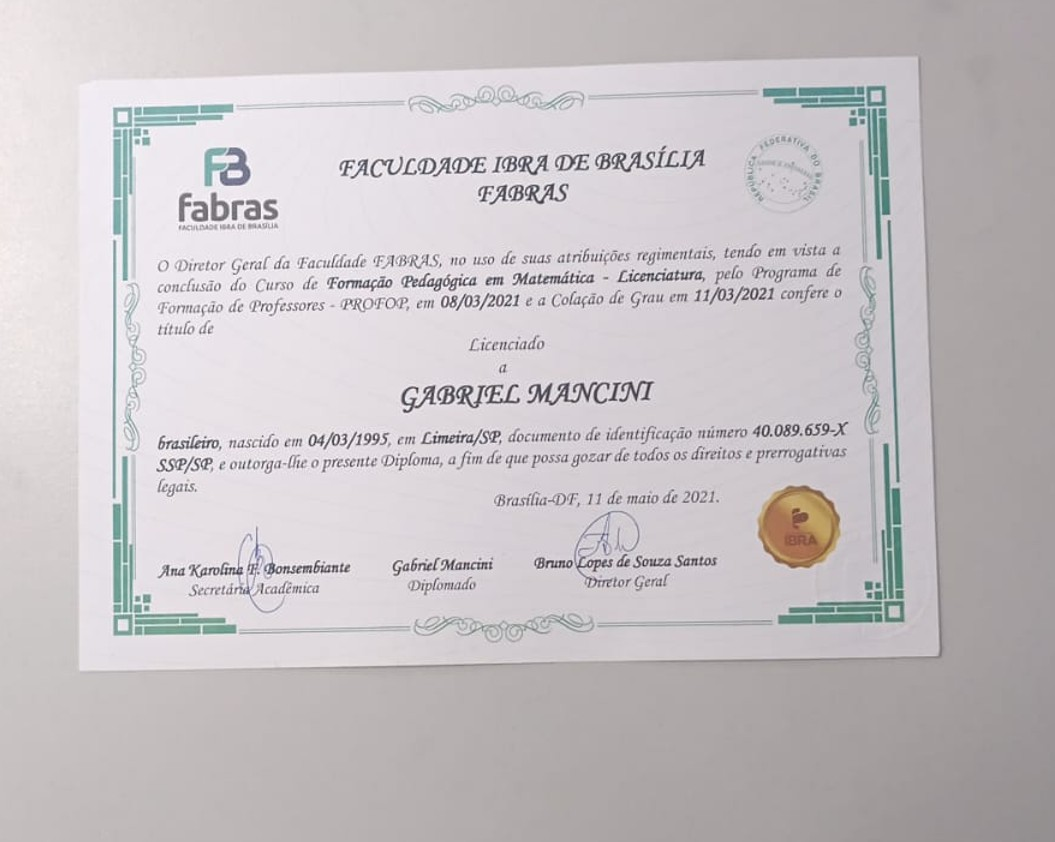

Imagem Pré-processada:


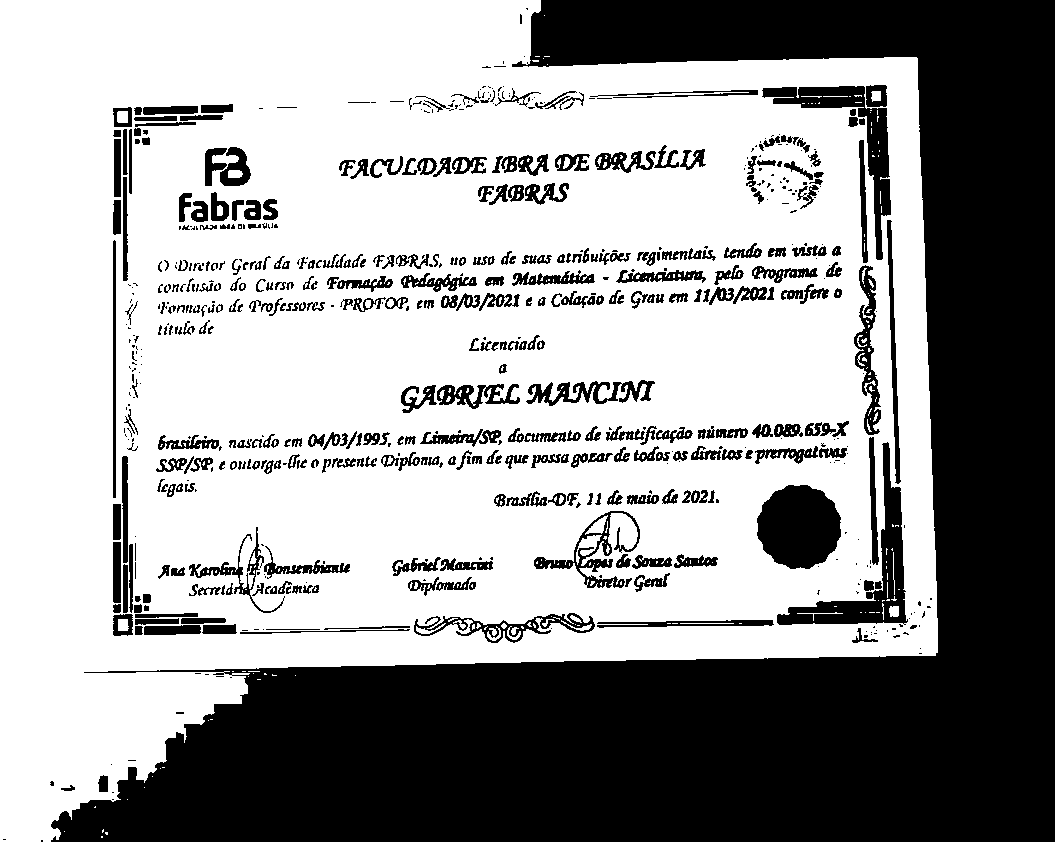


Texto Extraído:
V
gesse —— — E AA JA —— o
ms s

I ” A *
FB FACULDADE IBRADEGORASÍCIA — gm
E
| fabras FABRAS T
O iDiretor Geral da Faculdade FABRAS, no uso de suas atribinições regimentais, tendo em vista a
| Cnefusão do Curso de Formação Pedagógica em Matenática - Licnciatum, pelo Brograma de
j “Formação de Professores - PROTOS, em 08/03/2021 e a Colação de Grau em 11/03/2021 confere o
, tíulo de
É Licenciado
í a
A
N GABRIEL MANCINI
*  grusifiro, nascido em 04/03/1995, em Limeira/SB, documento de identificação número 40.089,659-X
SSEP/SP, « outorga-lhe o presente Diploma, a fim de que possa,  gorar de todos os direitos e prerrogativas
fegais,
I Brasilia-DF, 11 de maio de 2021 .
| . : À
I | Aro àmu:nóulu Gabriel Mancixi mª&mm :
em — Secretáriaicadêmica Diplomado iretor Geral l
Sh e .
DS —— PE ED ——
JET
n



In [47]:
# Instalar dependências necessárias
!sudo apt-get install -y tesseract-ocr
!pip install pytesseract opencv-python-headless

# Importar bibliotecas
import cv2
import pytesseract
from google.colab.patches import cv2_imshow

# Configurar Tesseract para o idioma português
!mkdir tessdata
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata

# Caminho para o arquivo da imagem
imagem_path = '/content/diploma.jpg'

# Função para pré-processar a imagem
def preprocessar_imagem(caminho):
    # Carregar imagem
    imagem = cv2.imread(caminho)

    # Converter para escala de cinza
    cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

    # Aplicar filtro de binarização
    _, binarizada = cv2.threshold(cinza, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Retornar imagem binarizada
    return imagem, binarizada

# Pré-processar a imagem
imagem_original, imagem_processada = preprocessar_imagem(imagem_path)

# Exibir imagem original e processada
print("Imagem Original:")
cv2_imshow(imagem_original)

print("Imagem Pré-processada:")
cv2_imshow(imagem_processada)

# Configuração do Tesseract
config_tesseract = '--tessdata-dir ./tessdata --psm 6'

# Extrair texto com Tesseract
texto_extraido = pytesseract.image_to_string(imagem_processada, lang='por', config=config_tesseract)

# Exibir texto extraído
print("\nTexto Extraído:")
print(texto_extraido)


Imagem Pré-processada:


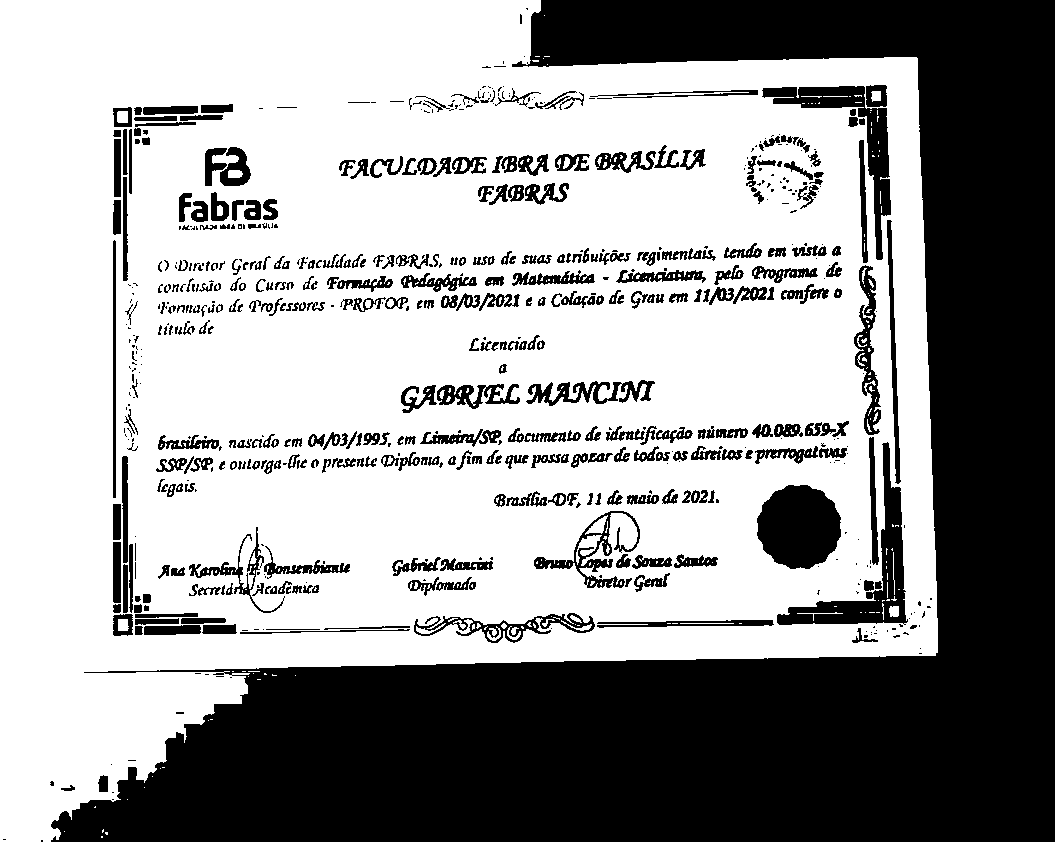

In [61]:
print("Imagem Pré-processada:")
cv2_imshow(imagem_processada)
img = imagem_processada


# Importando as bibliotecas

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from imutils.object_detection import non_max_suppression

# Conectando ao Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp /content/drive/MyDrive/Colab\ Notebooks/Modelos/Modelos/frozen_east_text_detection.pb ./

In [ ]:
!cp -R /content/drive/MyDrive/Cursos\ -\ recursos/OCR\ com\ Python/Imagens images/

# Processando a imagem

In [4]:
detector = '/content/frozen_east_text_detection.pb'
largura, altura = 320, 320

In [6]:
imagem = '/content/diploma.jpg'
min_confianca = 0.9 #@param {type: 'number', min:0.0, max:1.0}

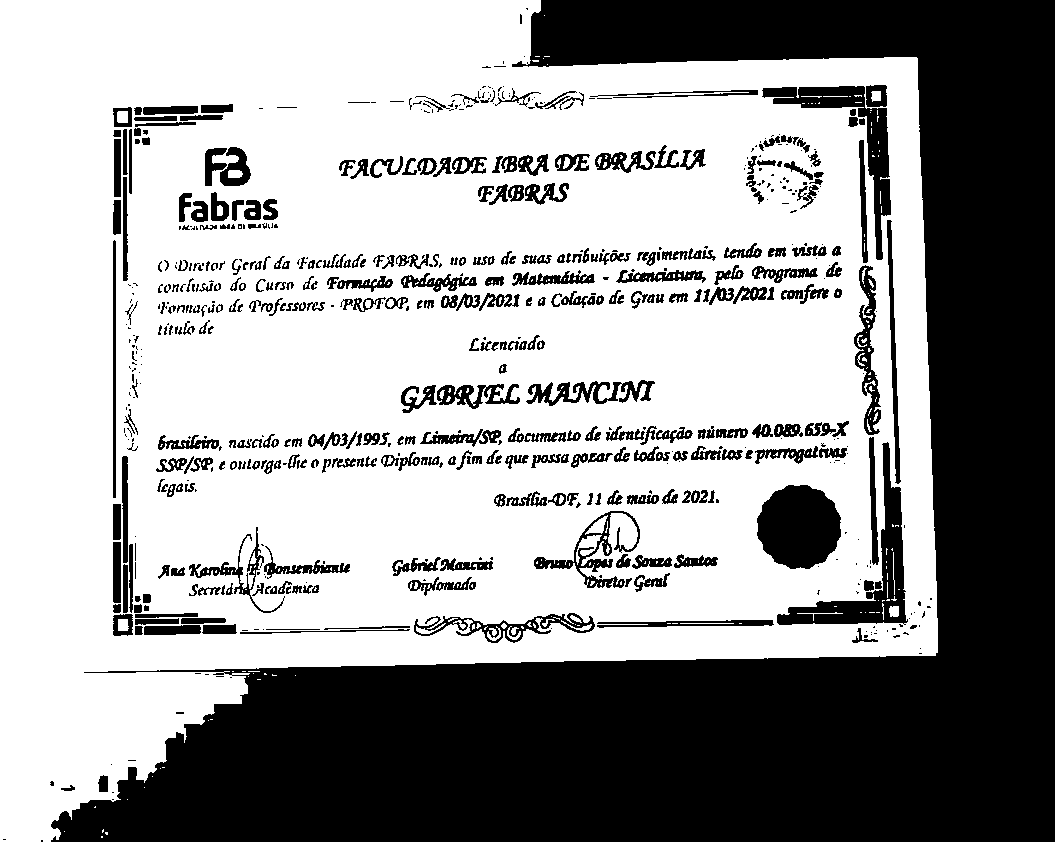

In [62]:
#img = cv2.imread(imagem)
cv2_imshow(img)

In [63]:
original = img.copy()

In [64]:
img.shape

(842, 1055)

In [65]:
H = img.shape[0]
W = img.shape[1]
print(H, W)

842 1055


In [66]:
proporcao_W = W / float(largura)
proporcao_H = H / float(altura)
print(proporcao_W, proporcao_H)

3.296875 2.63125


In [67]:
img = cv2.resize(img, (largura, altura))
H = img.shape[0]
W = img.shape[1]
print(H, W)

320 320


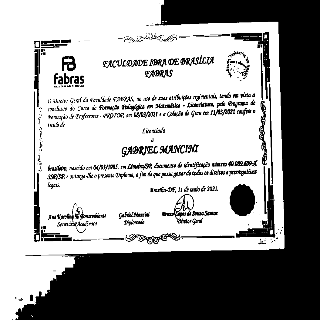

In [68]:
cv2_imshow(img)

# Carregando a rede neural

In [69]:
nomes_camadas = ['feature_fusion/Conv_7/Sigmoid', 'feature_fusion/concat_3']

In [70]:
rede_neural = cv2.dnn.readNet(detector)

In [71]:
img.shape

(320, 320)

In [72]:
blob = cv2.dnn.blobFromImage(img, 1.0, (W, H), swapRB = True, crop = False)

In [73]:
blob.shape # batch_size

(1, 1, 320, 320)

In [75]:
rede_neural.setInput(blob)
scores, geometry = rede_neural.forward(nomes_camadas)

error: OpenCV(4.10.0) /io/opencv/modules/dnn/src/layers/convolution_layer.cpp:395: error: (-2:Unspecified error) Number of input channels should be multiple of 3 but got 1 in function 'getMemoryShapes'


In [76]:
scores

array([[[[2.2638872e-07, 8.6133065e-07, 1.2719127e-06, ...,
          2.7726169e-06, 5.0631030e-07, 2.5924746e-06],
         [4.5739051e-07, 2.2686399e-07, 3.6440596e-07, ...,
          1.0198464e-06, 3.2681655e-07, 2.6803764e-06],
         [5.8692251e-07, 3.7697694e-07, 4.2127871e-07, ...,
          7.6768146e-07, 8.1356369e-08, 3.8800536e-06],
         ...,
         [1.4243971e-06, 1.0017561e-06, 1.3679456e-06, ...,
          6.5234730e-07, 1.1286351e-07, 4.4988610e-06],
         [9.0009127e-07, 6.0371576e-07, 9.4828715e-07, ...,
          2.0215832e-06, 1.0962673e-06, 4.9931077e-06],
         [6.9124513e-07, 6.4462732e-08, 7.0748243e-08, ...,
          3.1650328e-07, 7.3432375e-08, 2.0215627e-07]]]], dtype=float32)

In [77]:
geometry

array([[[[ 1.56160507e+02,  1.07735268e+02,  1.16198715e+02, ...,
           1.29625458e+02,  1.21794777e+02,  1.54400818e+02],
         [ 1.15086494e+02,  6.23368683e+01,  6.79704666e+01, ...,
           7.34889603e+01,  7.29835587e+01,  1.11036797e+02],
         [ 1.18506134e+02,  6.50191650e+01,  6.87030258e+01, ...,
           7.74842987e+01,  7.82235718e+01,  1.18468239e+02],
         ...,
         [ 1.36477142e+02,  8.00662384e+01,  8.89903946e+01, ...,
           8.67087784e+01,  8.60091171e+01,  1.24222702e+02],
         [ 1.34141663e+02,  8.13393173e+01,  9.32105789e+01, ...,
           9.01494522e+01,  8.61076965e+01,  1.16549232e+02],
         [ 1.68879456e+02,  1.26903046e+02,  1.44954849e+02, ...,
           1.34851974e+02,  1.26247086e+02,  1.49343628e+02]],

        [[ 1.07986023e+02,  8.55759430e+01,  8.13193970e+01, ...,
           9.43277664e+01,  8.89099426e+01,  1.16714699e+02],
         [ 8.03366928e+01,  4.77778168e+01,  4.53609581e+01, ...,
           5.33297577e

In [78]:
geometry[0,0,0]

array([156.1605  , 107.73527 , 116.198715, 116.81042 , 118.37073 ,
       120.07785 , 120.69013 , 120.691345, 120.8829  , 120.95736 ,
       121.01732 , 121.258545, 121.66704 , 121.97417 , 122.36901 ,
       122.962814, 123.52833 , 124.181244, 124.89446 , 125.788734,
       126.57828 , 127.45654 , 128.36613 , 129.30043 , 130.14133 ,
       130.7426  , 131.21582 , 131.76242 , 132.19255 , 132.63962 ,
       133.03334 , 133.35886 , 133.71918 , 133.97908 , 134.1838  ,
       134.253   , 134.26645 , 134.29843 , 134.32019 , 134.31361 ,
       134.35521 , 134.44012 , 134.51245 , 134.535   , 134.6037  ,
       134.70111 , 134.9458  , 135.26624 , 135.62636 , 135.9084  ,
       136.14012 , 136.29482 , 136.34622 , 136.23683 , 136.07195 ,
       135.79994 , 135.53778 , 135.2211  , 134.81076 , 134.203   ,
       133.51753 , 132.7688  , 132.07382 , 131.47482 , 130.97884 ,
       130.45274 , 129.94263 , 129.60864 , 129.41736 , 129.11772 ,
       128.90654 , 128.63768 , 128.41122 , 127.50039 , 126.047

In [79]:
scores.shape

(1, 1, 80, 80)

In [80]:
scores.shape[2:4]

(80, 80)

In [81]:
linhas, colunas = scores.shape[2:4]

In [82]:
print(linhas, colunas)

80 80


In [83]:
caixas = []
confiancas = []

# Decodificando os valores

- Explicação sobre os [valores de geometria](https://stackoverflow.com/questions/55583306/decoding-geometry-output-of-east-text-detection)

In [84]:
def dados_geometricos(geometry, y):
  xData0 = geometry[0, 0, y]
  xData1 = geometry[0, 1, y]
  xData2 = geometry[0, 2, y]
  xData3 = geometry[0, 3, y]
  data_angulos = geometry[0, 4, y]
  return data_angulos, xData0, xData1, xData2, xData3

In [85]:
def calculos_geometria(data_angulos, xData0, xData1, xData2, xData3):
  (offsetX, offsetY) = (x * 4.0, y * 4.0)
  angulo = data_angulos[x]
  cos = np.cos(angulo)
  sin = np.sin(angulo)
  h = xData0[x] + xData2[x]
  w = xData1[x] + xData3[x]

  fimX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
  fimY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))

  inicioX = int(fimX - w)
  inicioY = int(fimY - h)

  return inicioX, inicioY, fimX, fimY

In [86]:
linhas, colunas

(80, 80)

In [87]:
scores[0, 0, 0]

array([2.2638872e-07, 8.6133065e-07, 1.2719127e-06, 1.8085069e-06,
       2.2377608e-06, 1.6967282e-06, 1.7599554e-06, 2.1600156e-06,
       2.2986073e-06, 2.3637128e-06, 2.7883543e-06, 2.7592564e-06,
       2.6443279e-06, 2.6028820e-06, 2.5079582e-06, 2.3143125e-06,
       2.0778375e-06, 1.8003948e-06, 1.6089170e-06, 1.3370603e-06,
       1.2182552e-06, 1.0950437e-06, 9.9621616e-07, 8.7968948e-07,
       7.9539439e-07, 6.7796896e-07, 6.0221032e-07, 5.5441029e-07,
       5.3415403e-07, 4.9856192e-07, 4.6589960e-07, 4.5555387e-07,
       4.3511812e-07, 4.1469247e-07, 3.8780567e-07, 3.8909559e-07,
       4.0861460e-07, 4.1722652e-07, 4.1072394e-07, 4.1112131e-07,
       4.1364814e-07, 4.1503509e-07, 4.1465805e-07, 4.0844162e-07,
       3.9882525e-07, 3.9194728e-07, 3.9811576e-07, 3.9791192e-07,
       3.9959315e-07, 3.9262443e-07, 3.8821491e-07, 3.8045101e-07,
       3.7926497e-07, 3.8504800e-07, 3.7518365e-07, 3.7805054e-07,
       3.9383383e-07, 4.2339971e-07, 4.4268356e-07, 4.5530544e

In [88]:
for y in range(0, linhas):
  #print(y)
  data_scores = scores[0, 0, y]

  data_angulos, xData0, xData1, xData2, xData3 = dados_geometricos(geometry, y)

  for x in range(0, colunas):
    if data_scores[x] < min_confianca:
      continue

    inicioX, inicioY, fimX, fimY = calculos_geometria(data_angulos, xData0, xData1, xData2, xData3)
    confiancas.append(data_scores[x])
    caixas.append((inicioX, inicioY, fimX, fimY))

In [89]:
confiancas

[0.99217284,
 0.9995913,
 0.99972695,
 0.99979085,
 0.99983954,
 0.99985945,
 0.9998604,
 0.9998299,
 0.99978083,
 0.99951565,
 0.99971884,
 0.9997377,
 0.9997522,
 0.9998229,
 0.99983966,
 0.99983335,
 0.9998684,
 0.9999213,
 0.9999547,
 0.99995697,
 0.99995995,
 0.99995327,
 0.9999087,
 0.9989053,
 0.9999434,
 0.9999733,
 0.99996436,
 0.9999472,
 0.9998294,
 0.99982244,
 0.99995565,
 0.99993527,
 0.9050831,
 0.9998982,
 0.9999304,
 0.9999325,
 0.9995844,
 0.97922164,
 0.99993634,
 0.99996746,
 0.9999709,
 0.9999722,
 0.9999645,
 0.99987996,
 0.98835725,
 0.9990802,
 0.9994735,
 0.99960834,
 0.99960965,
 0.999566,
 0.9863166,
 0.9987633,
 0.99978036,
 0.99985015,
 0.9998642,
 0.99983835,
 0.9998173,
 0.99982685,
 0.99968886,
 0.95226616,
 0.9983675,
 0.97456217,
 0.9463192,
 0.9939219,
 0.9823836]

In [90]:
caixas

[(99, 53, 153, 66),
 (101, 52, 152, 65),
 (100, 52, 151, 65),
 (101, 52, 151, 65),
 (102, 54, 150, 66),
 (103, 54, 148, 67),
 (103, 54, 147, 67),
 (104, 54, 148, 67),
 (107, 55, 150, 68),
 (146, 53, 187, 65),
 (149, 53, 191, 64),
 (151, 53, 195, 64),
 (153, 52, 197, 64),
 (155, 52, 199, 64),
 (158, 52, 205, 64),
 (161, 52, 212, 64),
 (166, 51, 219, 64),
 (171, 52, 222, 64),
 (174, 52, 222, 64),
 (177, 51, 221, 64),
 (179, 51, 219, 64),
 (179, 52, 217, 65),
 (179, 52, 217, 65),
 (178, 52, 218, 65),
 (100, 54, 153, 66),
 (101, 54, 151, 66),
 (101, 54, 151, 66),
 (102, 53, 151, 65),
 (103, 54, 150, 66),
 (104, 54, 149, 66),
 (104, 55, 148, 67),
 (105, 55, 148, 67),
 (108, 55, 151, 67),
 (143, 65, 178, 76),
 (144, 65, 180, 76),
 (146, 65, 182, 76),
 (148, 66, 184, 77),
 (52, 71, 89, 85),
 (52, 72, 88, 85),
 (53, 71, 89, 84),
 (53, 72, 88, 84),
 (53, 72, 87, 84),
 (54, 73, 87, 85),
 (55, 74, 88, 85),
 (119, 140, 176, 155),
 (118, 140, 173, 155),
 (117, 141, 170, 155),
 (118, 141, 169, 155),

In [91]:
deteccoes = non_max_suppression(np.array(caixas), probs=confiancas)

In [92]:
deteccoes

array([[101,  54, 151,  66],
       [ 53,  72,  87,  84],
       [179,  51, 219,  64],
       [146,  65, 182,  76],
       [156, 141, 211, 154],
       [118, 141, 168, 155],
       [146,  53, 187,  65],
       [ 43, 206,  90, 221],
       [ 60, 164,  98, 179]])

In [93]:
proporcao_H, proporcao_W

(2.63125, 3.296875)

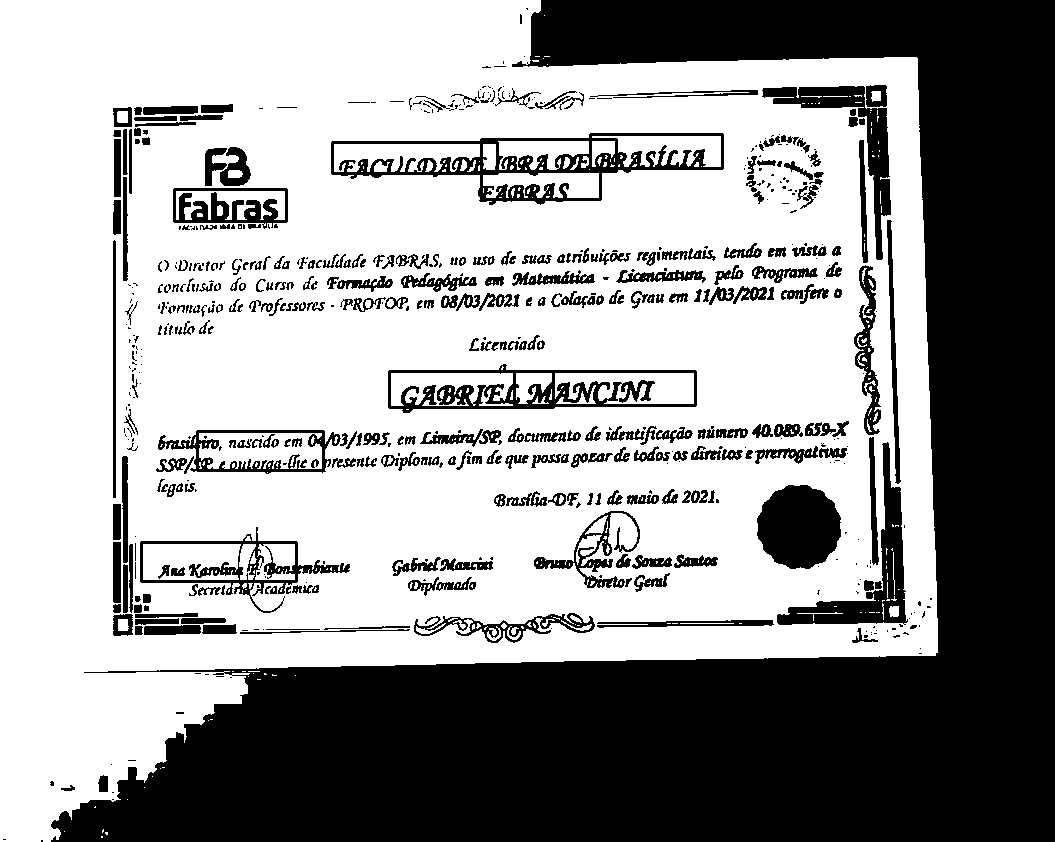

In [94]:
copia = original.copy()
for (inicioX, inicioY, fimX, fimY) in deteccoes:
  #print(inicioX, inicioY, fimX, fimY)
  inicioX = int(inicioX * proporcao_W)
  inicioY = int(inicioY * proporcao_H)
  fimX = int(fimX * proporcao_W)
  fimY = int(fimY * proporcao_H)

  # region of interest
  roi = copia[inicioY:fimY, inicioX:fimX]

  cv2.rectangle(original, (inicioX, inicioY), (fimX, fimY), (0,255,0), 2)
cv2_imshow(original)

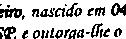

In [95]:
cv2_imshow(roi)

In [96]:
roi = cv2.resize(roi, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)

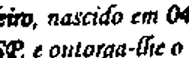

In [97]:
cv2_imshow(roi)

# Reconhecimento do texto

In [98]:
!sudo apt install tesseract-ocr
!pip install pytesseract

import pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


*Aviso: em setembro de 2021 o link para baixar o **por.traineddata** sofreu uma pequena alteração [ para mais explicações consulte a aula "Resolvendo problema relacionado ao pacote de idiomas" ]*

Portanto, o link final ficou: https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true (segue abaixo o comando completo)

In [99]:
!mkdir tessdata
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true

mkdir: cannot create directory ‘tessdata’: File exists
--2024-11-19 13:20:11--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/por.traineddata [following]
--2024-11-19 13:20:11--  https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/por.traineddata [following]
--2024-11-19 13:20:11--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubus

In [100]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


In [101]:
config_tesseract = "--tessdata-dir tessdata --psm 7"

e FarcIIcmaDiA: |

FfFabras

i abaçiria |

e PABÉPAÇ





firo, nascido em O



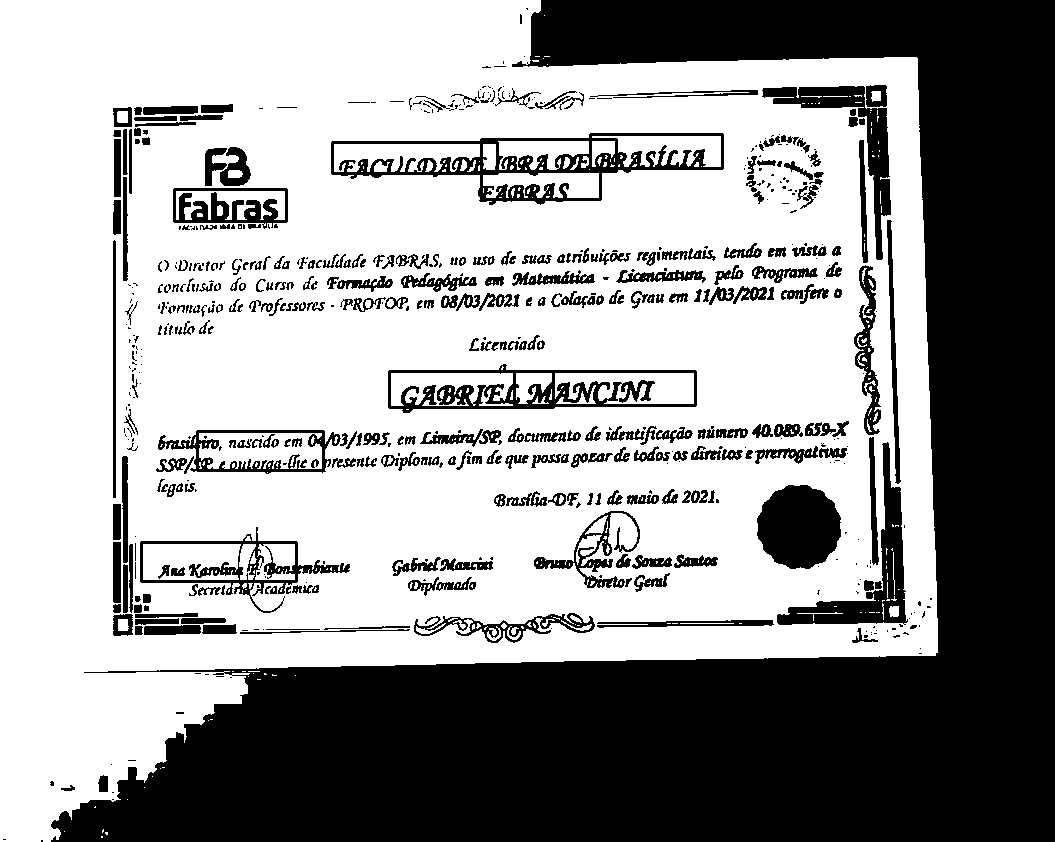

In [102]:
copia = original.copy()
for (inicioX, inicioY, fimX, fimY) in deteccoes:
  inicioX = int(inicioX * proporcao_W)
  inicioY = int(inicioY * proporcao_H)
  fimX = int(fimX * proporcao_W)
  fimY = int(fimY * proporcao_H)

  roi = copia[inicioY:fimY, inicioX:fimX]
  texto = pytesseract.image_to_string(roi, lang='por', config=config_tesseract)
  print(texto)

  cv2.rectangle(original, (inicioX, inicioY), (fimX, fimY), (0,255,0), 2)
cv2_imshow(original)

## Expandindo o ROI do texto

ET



Fopoo]



B9.659-X |



(27/08/2024 |



NISPIS/PASE



RITORTO]



' 1DADE PROFISSIONAL -



[426993068/35])



——



2via |



g mo7726 )



JATAÍ CN:LV.AI6 /FLS.1/ A /8



[CIONABAA



RLMUTAR



eem |



rAGOSTL



| RIO CLARO-SP)



[STRO GERAL 4



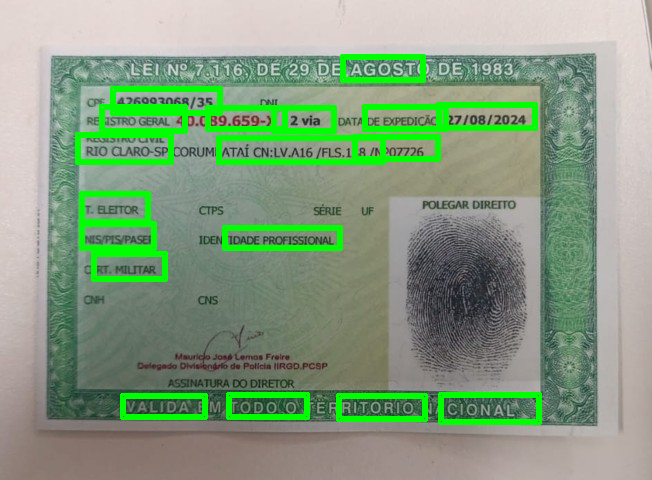

In [61]:
margem = 3
copia = original.copy()
for (inicioX, inicioY, fimX, fimY) in deteccoes:
  inicioX = int(inicioX * proporcao_W)
  inicioY = int(inicioY * proporcao_H)
  fimX = int(fimX * proporcao_W)
  fimY = int(fimY * proporcao_H)

  roi = copia[inicioY - margem:fimY + margem, inicioX - margem:fimX + margem]
  cv2_imshow(roi)
  texto = pytesseract.image_to_string(roi, lang='por', config=config_tesseract)
  print(texto)

  cv2.rectangle(copia, (inicioX - margem, inicioY - margem), (fimX + margem, fimY + margem), (0,255,0), 2)
cv2_imshow(copia)